# Smartphones Sales Dataset Analysis

- Kaggle Dataset: https://www.kaggle.com/datasets/yaminh/smartphone-sale-dataset?resource=download

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

print("NumPy Version: ",np.__version__)
print("Pandas Version: ",pd.__version__)
print("Matplotlib Version: ",matplotlib.__version__)
print("Seaborn Version: ",sns.__version__)

NumPy Version:  1.26.4
Pandas Version:  2.2.2
Matplotlib Version:  3.10.3
Seaborn Version:  0.13.2


In [2]:
df = pd.read_csv('Smartphones_Sales.csv')
df.head(3)

,Brands,Models,Colors,Memory,Storage,Camera,Rating,Selling Price,Original Price,Mobile,Discount,discount percentage
0,SAMSUNG,GALAXY M31S,Mirage Black,8 GB,128 GB,Yes,4.3,19330,20999,SAMSUNG GALAXY M31S,1669,7.947998
1,Nokia,3.2,Steel,2 GB,16 GB,Yes,3.8,10199,10199,Nokia 3.2,0,0.000000
2,realme,C2,Diamond Black,2 GB,NaN,Yes,4.4,6999,7999,realme C2,1000,12.501563


### Finding Columns with Missing Values

In [3]:
missing_cols = df.columns[df.isnull().any()]
print("Columns with missing values:\n", missing_cols)

Columns with missing values:
 Index(['Memory', 'Storage', 'Rating'], dtype='object')


In [4]:
# df.isnull().any()   # shows which columns have any missing values (True/False)
df.isnull().sum()   # shows count of missing values per column


Brands                   0
Models                   0
Colors                   0
Memory                  43
Storage                 39
Camera                   0
Rating                 144
Selling Price            0
Original Price           0
Mobile                   0
Discount                 0
discount percentage      0
dtype: int64

### Converting Memory and Storage (in the form of String values - 3 GB) into Float Values for analysis

In [5]:
df['Memory_GB'] = df['Memory'].str.extract(r'(\d+)').astype(float)
df['Storage_GB'] = df['Storage'].str.extract(r'(\d+)').astype(float)

df.head(3)

,Brands,Models,Colors,Memory,Storage,Camera,Rating,Selling Price,Original Price,Mobile,Discount,discount percentage,Memory_GB,Storage_GB
0,SAMSUNG,GALAXY M31S,Mirage Black,8 GB,128 GB,Yes,4.3,19330,20999,SAMSUNG GALAXY M31S,1669,7.947998,8.0,128.0
1,Nokia,3.2,Steel,2 GB,16 GB,Yes,3.8,10199,10199,Nokia 3.2,0,0.000000,2.0,16.0
2,realme,C2,Diamond Black,2 GB,NaN,Yes,4.4,6999,7999,realme C2,1000,12.501563,2.0,NaN


### Filling missing values with the Median Value of that particular column

In [6]:
df['Memory_GB'] = df['Memory_GB'].fillna(df['Memory_GB'].median())
df['Storage_GB'] = df['Storage_GB'].fillna(df['Storage_GB'].median())

df.head(3)

,Brands,Models,Colors,Memory,Storage,Camera,Rating,Selling Price,Original Price,Mobile,Discount,discount percentage,Memory_GB,Storage_GB
0,SAMSUNG,GALAXY M31S,Mirage Black,8 GB,128 GB,Yes,4.3,19330,20999,SAMSUNG GALAXY M31S,1669,7.947998,8.0,128.0
1,Nokia,3.2,Steel,2 GB,16 GB,Yes,3.8,10199,10199,Nokia 3.2,0,0.000000,2.0,16.0
2,realme,C2,Diamond Black,2 GB,NaN,Yes,4.4,6999,7999,realme C2,1000,12.501563,2.0,64.0


## Analysis performed and Insights drawn on:
- Market-share of Brands
- Price Drivers
    - Memory
    - Storage
- User sentiment (Rating) vs Price


### Focus on the highest selling brand : SAMSUNG
- Market-share of different models
- Price Drivers
    - Memory
    - Storage
- User Sentiment vs Price
- Anomaly and Outlier Hunt

## 1. Market-share
Analytical insights on Market Composition

#### Q) Which Brand has the highest market share?
#### Horizontal Bar Plot shows us that SAMSUNG has the highest market share

<Axes: xlabel='Number of phones sold', ylabel='Brands'>

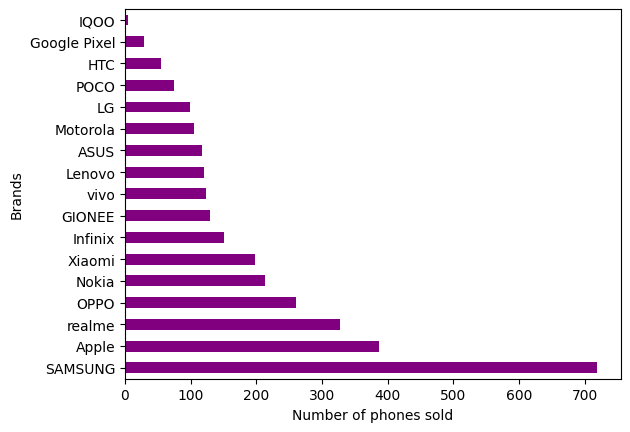

In [7]:
brand_counts = df['Brands'].value_counts()
brand_counts.plot(kind='barh', xlabel = 'Number of phones sold', color = 'purple')

## 2. Price Drivers
- 2.1 Memory
- 2.2 Storage

### 2.1 Memory vs Selling Price

#### Memory and Selling Price have a very slight negative correlation (-0.085) as evidenced by a Correlation Heatmap, Line Plot and Scatter Plot

In [9]:
corr1 = df[['Memory_GB','Selling Price']].corr()
corr1

,Memory_GB,Selling Price
Memory_GB,1.000000,-0.085585
Selling Price,-0.085585,1.000000


<Axes: >

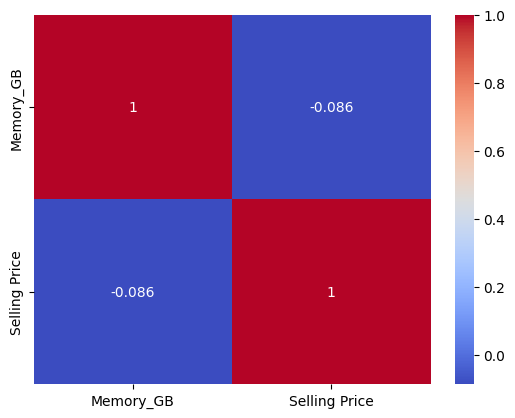

In [10]:
sns.heatmap(corr1, annot = True, cmap = 'coolwarm')

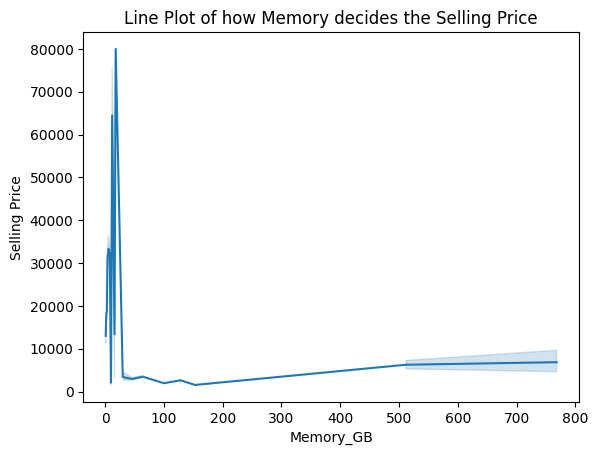

In [11]:
sns.lineplot(x = 'Memory_GB' , y = 'Selling Price' , data = df )
plt.title('Line Plot of how Memory decides the Selling Price')
plt.show()

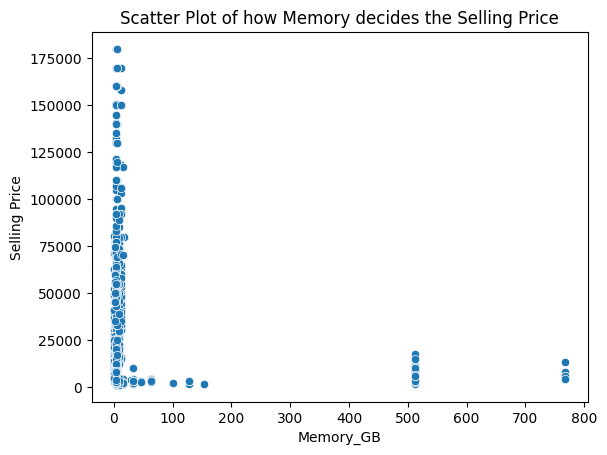

In [12]:
sns.scatterplot(x = 'Memory_GB' , y = 'Selling Price' , data = df )
plt.title('Scatter Plot of how Memory decides the Selling Price')
plt.show()

### 2.2 Storage vs Selling Price

#### Storage and Selling Price have a negative correlation (+0.655) as evidenced by a Correlation Heatmap, Line Plot and Scatter Plot

In [13]:
corr2 = df[['Storage_GB','Selling Price']].corr()
corr2

,Storage_GB,Selling Price
Storage_GB,1.000000,0.655812
Selling Price,0.655812,1.000000


<Axes: >

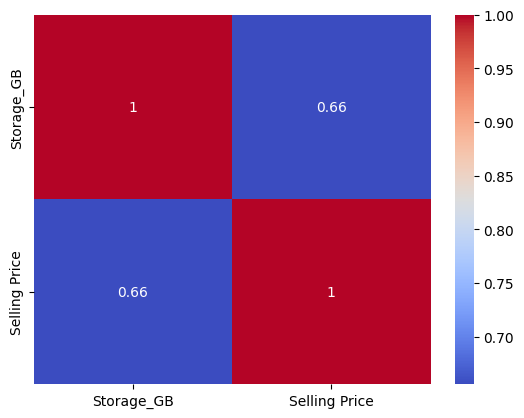

In [14]:
sns.heatmap(corr2, annot = True, cmap = 'coolwarm')

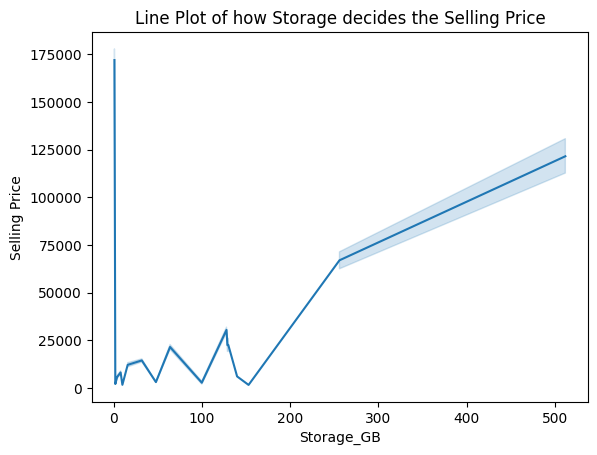

In [15]:
sns.lineplot(x = 'Storage_GB' , y = 'Selling Price' , data = df )
plt.title('Line Plot of how Storage decides the Selling Price')
plt.show()

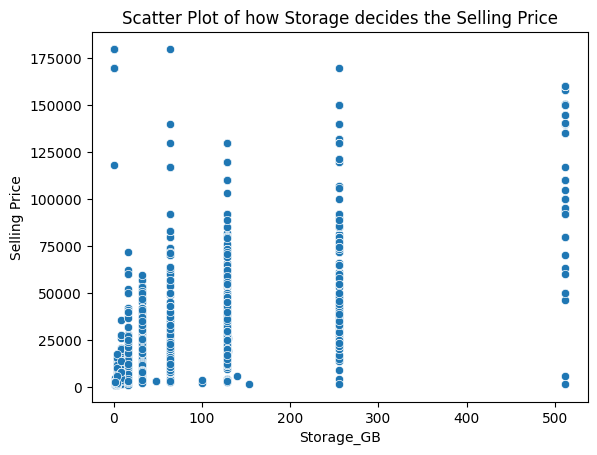

In [16]:
sns.scatterplot(x = 'Storage_GB' , y = 'Selling Price' , data = df )
plt.title('Scatter Plot of how Storage decides the Selling Price')
plt.show()

## 3.  User Sentiment (Rating) vs Selling Price

### Rating and Selling Price have a positive correlation (+0.458) as evidenced by a Correlation Heatmap, Scatter Plot and Line Plot

In [17]:
corr3 = df[['Rating','Selling Price']].corr()
corr3

,Rating,Selling Price
Rating,1.000000,0.458545
Selling Price,0.458545,1.000000


<Axes: >

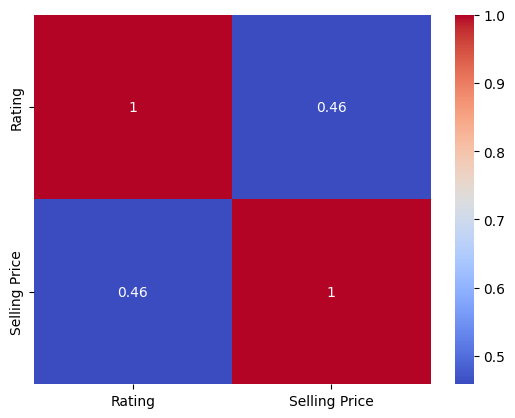

In [18]:
sns.heatmap(corr3, annot = True, cmap = 'coolwarm')

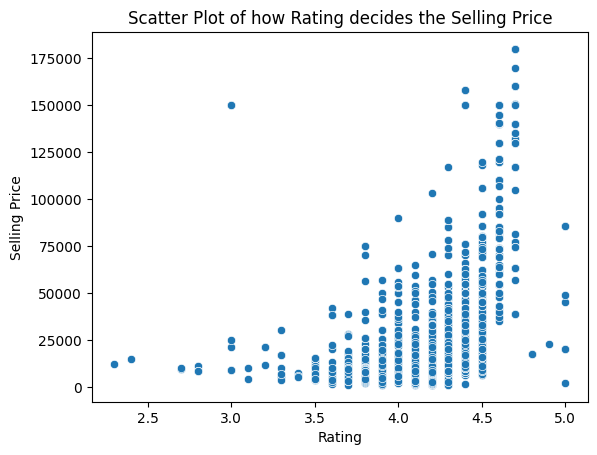

In [19]:
sns.scatterplot(x = 'Rating' , y = 'Selling Price' , data = df )
plt.title('Scatter Plot of how Rating decides the Selling Price')
plt.show()

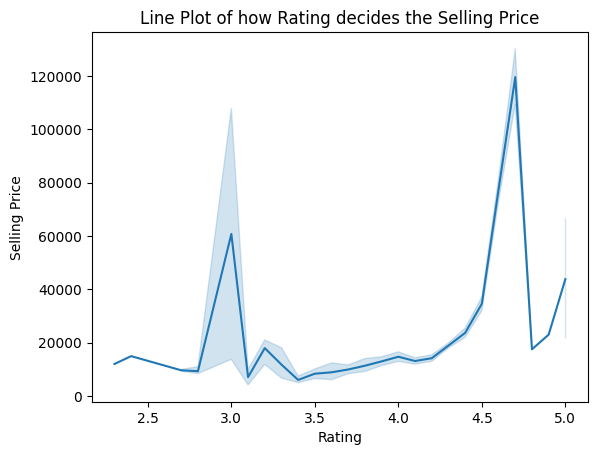

In [20]:
sns.lineplot(x = 'Rating' , y = 'Selling Price' , data = df )
plt.title('Line Plot of how Rating decides the Selling Price')
plt.show()